# Capstone Project - Car Accident Severity (Week 3) 
## Python Notebook 

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data Preparation](#data)
* [Methodology](#methodology)
* [Exploratory Data Analysis](#e)
* [Modeling, Testing and Evaluation](#m)
* [Results and Discussion](#r)
* [Conclusion and Outlook](#c)

## Introduction: Business Problem <a name="introduction"></a>

## 1. Introduction / Business Problem  

### 1.1. Background

Road traffic injuries (RTIs) are a major public health problem. The annual global status reports on road safety, launched by the World Health Organization (WHO), highlights that the number of road traffic deaths has exceeded one million in recent years. That is over 3000 people dying on the world's roads every day.[1] Therefore, analyzing the various factors that could help predict accident severity can guide the government administration to implement changes in a timely manner that may reduce the number of fatalities & serious injuries.

In the past few years, the volume of research in the areas of accident analysis and prediction has been increasing. Among the analytical data mining solutions, supervised machine learning (ML), has become a popular scientific method to predict the severity of accidents. The reasons for this popularity, can be referred to the capacity present in ML to identify the existing patterns in the data and make predictions via the establishment and evaluation of diverse algorithms. Moreover, the ability of MLs to handle large amounts of data is an additional asset for this purpose, as the data on road traffic accidents are often sparse and largely extended.

### 1.2. Objective
The objective of this capstone project is to analyze the collision data set for Seattle, WA and determine the most possible factors including weather, road conditions, visibility, and various other factors that best predict accident severity by training and evaluating supervised machine learning algorithms. 

This project will be used to answer the business question: How can the city of Seattle, Washington best predict the severity of collisions that occur and what avenues can be
explored to remedy this issue?


### 1.3. Target Audience 
The report of this project can be targeted to stakeholders, who are involved with road traffic injuries, such as road administrators, traffic control authorities, and emergency road services in order to help them predict the car accident severities and improve the road users' safety margins.



### References 
[1].World Health Organization: http://www.who.int 




## Data Preparation <a name="data"></a>

### 2.1. Data Source

It is now time to understand the data and then prepare it to be fed into the modeling tools. The given dataset used in this project (provided by the coursera example data ) can be downloaded here: https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv 

The example dataset (Data-Collisions.csv) contains 194673 and 38 columns including the labeled
data. The labeled data is the "Severity Code", which describes the fatality of an accident. In the shared dataset, the severity code column consists of two values: 1 for property damage and 2
for injury. The dataset includes different attributes, describing a variety of conditions: 
location, weather, light, road, collision types, and so forth that may influence the severity of the accidents. The attributes are of the types of int64, float64, or object.



Lets first load required libraries:

In [86]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
from sklearn.utils import resample
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import matplotlib as mpl

Load Data From CSV File  

In [2]:
df = pd.read_csv('Data-Collisions.csv')
df.head()

/Users/ZhouHui/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


### 2.2. Data Cleaning

There are several issues which are needed to be addressed during the data cleaning. One issue
is many cells with missing values. The other issue with these missing values is that they are
widely spread within 19 columns out of 38 columns in the dataset coming with a “NaN” mark.
As this distribution ratio is considerably high, the replacement of the missing data with
reasonable new values is a better option as far as possible.

The other issue is the presence of both numerical and categorical data in the dataset. To this
effect, the replacement is done by the frequency for the categorical variables and by mean for
the numerical values. The missing categorical values that are replaced by the largest frequency
belongs to the columns WEATHER, SPEEDING, LIGHTCOND, ROADCOND,JUNCTIONTYPE, INATTENTIONIND, COLLISIONTYPE, and ADDRTYPE. The missing numeric values in columns X and Y are replaced by the mean of the belonging columns, respectively.

What should be also taken into account, specifically for processing the data in the next steps,is
the incompatibility of categorical variables with the predictive model analysis tools. For example, to develop regression models and being able to use packages such as Sklearn, these variables are converted into indicator variables during the data cleaning after handling the missing data.

In [7]:
# Rename X and Y with Longitude and Latitude 
df1 = df.rename(columns={'X': 'LONGITUDE', 'Y': 'LATITUDE'})
df1.head()

,SEVERITYCODE,LONGITUDE,LATITUDE,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N



### 2.3. Feature Selection

Taking a closer look into the dataset reveals that many of the columns contain inter-organizational codes which are not relevant to the case of this study and are deleted. These
columns include OBJECTID, INCKEY, COLDETKEY, REPORTNO, INTKEY, EXCEPTRSNCODE, SDOT_COLCODE, SDOTCOLNUM, ST_COLCODE, ST_COLDESC, SEGLANEKEY, and CROSSWALKKEY. For example, the column SDOT_COLCODE refers to the codes given to the collision by SDOT or the columns INCKEY and COLDETKEY contain the ESRI unique identifier and so on.

Some of the columns also consist of redundant or not enough useful information. For example,
there is a second SEVERITYCODE.1 in addition to the SEVERITYCODE which will be deleted.
The redundancy in data is also observed for columns such as EXCEPTRSNDESC with no
description. The other example is the column UNDERINF which addresses the question:”
Whether or not a driver involved was under the influence of drugs or alcohol?” There is however
another column named INATTENTIONIND addressing the question: “Whether collision was due
to inattention?”

The level of attention in people is usually decreased upon consuming drugs or alcoholic drinks.
Accordingly, UNDERINF is deleted and INATTENTIONIND is remained to count for the level of
attention. The same analogy is considered for the column LOCATION, as both the X (longitude)
and Y (latitudes) are given. Working with X and Y coordinates has also the advantage of a more
precise description of the places where the accident occurred. For more clarity, X and Y are also
renamed to LONGITUDE and LATITUDE. The same analogy is also considered for the columns
STATUS, INCDATE, INCDTTM, SDOT_COLDESC, PEDROWNOTGRNT, ST_COLDESC, PEDCYLCOUNT, HITPARKEDCAR, SEVERITYDESC, ADDRTYPE, and PEDCOUNT. The 10 features selected at the end of this step are listed in Table 1.

Table 1 - List of features being selected in the feature selection

| ID | Feature | Description | 
| ---- | :----| :---- | 
|1 |LONGITUDE     |   longitude                                                                    |
|2 |LATITUDE      |  latitude                                                                      |
|3 |PERSONCOUNT   |  total number of people involved in the collision                              |
|4 |VEHCOUNT      | the number of vehicles involved in the collision                               |
|5 |JUNCTIONTYPE  |  category of junction at which collision took place                            |
|6 |INATTENTIONIND|  whether or not collision was due to inattention                               |
|7 |WEATHER       |  a description of the weather conditions durring the time of the collision     |
|8 |ROADCOND      |  the condition of the road during the collision                                |
|9 |LIGHTCOND     |  the light conditions during the collision.                                    |
|10| SPEEDING     | whether or not speeding was a factor in the collision                          |

In [8]:
# Drop LOCATION; Langitude and Latitude used instead.
# Two copies of SEVERITYCODE exist, drop the second SEVERITYCODE.1
#Drop columns incluidng codes: OBJECTID, INCKEY, COLDETKEY, REPORTNO,INTKEY,EXCEPTRSNCODE, SDOT_COLCODE, SDOTCOLNUM --->
#ST_COLCODE, ST_COLDESC, SEGLANEKEY, CROSSWALKKEY 
#Drop redundant infos: STATUS, EXCEPTRSNDESC, INCDATE , INCDTTM, SDOT_COLDESC, PEDROWNOTGRNT,ST_COLDESC, UNDERINFL--->
#PEDCYLCOUNT, HITPARKEDCAR, SEVERITYDESC, ADDRTYPE  
df2 = df1.drop(["LOCATION", "SEVERITYCODE.1", "OBJECTID", "INCKEY", "COLDETKEY", "REPORTNO", "INTKEY", 
          "EXCEPTRSNCODE", "SDOT_COLCODE", "ST_COLCODE", "SEGLANEKEY", "CROSSWALKKEY", "SDOTCOLNUM", 
          "STATUS", "EXCEPTRSNDESC", "INCDATE", "INCDTTM", "SDOT_COLDESC", "PEDROWNOTGRNT", "UNDERINFL", 
        "PEDCYLCOUNT", "HITPARKEDCAR", "ST_COLDESC", "SEVERITYDESC", "ADDRTYPE", "COLLISIONTYPE", "PEDCOUNT"], axis=1)
df2.head()

,SEVERITYCODE,LONGITUDE,LATITUDE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,-122.323148,47.703140,2,2,At Intersection (intersection related),NaN,Overcast,Wet,Daylight,NaN
1,1,-122.347294,47.647172,2,2,Mid-Block (not related to intersection),NaN,Raining,Wet,Dark - Street Lights On,NaN
2,1,-122.334540,47.607871,4,3,Mid-Block (not related to intersection),NaN,Overcast,Dry,Daylight,NaN
3,1,-122.334803,47.604803,3,3,Mid-Block (not related to intersection),NaN,Clear,Dry,Daylight,NaN
4,2,-122.306426,47.545739,2,2,At Intersection (intersection related),NaN,Raining,Wet,Daylight,NaN


In [9]:
#Getting the type of each column
df2.dtypes

SEVERITYCODE        int64
LONGITUDE         float64
LATITUDE          float64
PERSONCOUNT         int64
VEHCOUNT            int64
JUNCTIONTYPE       object
INATTENTIONIND     object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
SPEEDING           object
dtype: object

In [10]:
#Getting the shape of the data frame
df2.shape

(194673, 11)

In [11]:
#Getting the name of each column
df2.columns

Index(['SEVERITYCODE', 'LONGITUDE', 'LATITUDE', 'PERSONCOUNT', 'VEHCOUNT',
       'JUNCTIONTYPE', 'INATTENTIONIND', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'SPEEDING'],
      dtype='object')

In [12]:
df2.isna().sum()

SEVERITYCODE           0
LONGITUDE           5334
LATITUDE            5334
PERSONCOUNT            0
VEHCOUNT               0
JUNCTIONTYPE        6329
INATTENTIONIND    164868
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
SPEEDING          185340
dtype: int64

In [13]:
#Returning the objects containing counts of unique values
df2['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

### Handling of missing Values

In [14]:
# Replacing NaN value by Unknown
df2['WEATHER'].replace(np.NaN, "Unknown", inplace=True)
df2.head()

,SEVERITYCODE,LONGITUDE,LATITUDE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,-122.323148,47.703140,2,2,At Intersection (intersection related),NaN,Overcast,Wet,Daylight,NaN
1,1,-122.347294,47.647172,2,2,Mid-Block (not related to intersection),NaN,Raining,Wet,Dark - Street Lights On,NaN
2,1,-122.334540,47.607871,4,3,Mid-Block (not related to intersection),NaN,Overcast,Dry,Daylight,NaN
3,1,-122.334803,47.604803,3,3,Mid-Block (not related to intersection),NaN,Clear,Dry,Daylight,NaN
4,2,-122.306426,47.545739,2,2,At Intersection (intersection related),NaN,Raining,Wet,Daylight,NaN


In [15]:
# Replacing Unknown and Other by Clear, the most frequent value of the column
encoding_WEATHER = {"WEATHER": 
                            {"Clear": 1,
                             "Unknown": 1,
                             "Other": 1,
                             "Raining": 2,
                             "Overcast": 3,
                             "Snowing": 4,
                             "Fog/Smog/Smoke": 5,
                             "Sleet/Hail/Freezing Rain": 6,
                             "Blowing Sand/Dirt": 7,
                             "Severe Crosswind": 8,
                             "Partly Cloudy": 9}}
df2.replace(encoding_WEATHER, inplace=True)
df2['WEATHER'].value_counts()

1    132139
2     33145
3     27714
4       907
5       569
6       113
7        56
8        25
9         5
Name: WEATHER, dtype: int64

In [16]:
df2['SPEEDING'].value_counts()

Y    9333
Name: SPEEDING, dtype: int64

In [17]:
# Replacing NaN value by N
df2['SPEEDING'].replace(np.NaN, "N", inplace=True)

In [18]:
encoding_SPEEDING = {"SPEEDING": 
                            {"Y": 1,
                             "N": 0,
                              }}
df2.replace(encoding_SPEEDING, inplace=True)
df2['SPEEDING'].value_counts()

0    185340
1      9333
Name: SPEEDING, dtype: int64

In [19]:
df2['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [20]:
# Replacing NaN value by Unknown
df2['LIGHTCOND'].replace(np.NaN, "Unknown", inplace=True)

In [21]:
# Replacing Unknown and Other by Daylight, the most frequent value of the column
encoding_LIGHTCOND = {"LIGHTCOND": 
                            {"Daylight": 0,
                             "Unknown": 0,
                             "Other": 0,
                             "Dark - Street Lights On": 1,
                             "Dusk": 1,
                             "Dawn": 1,
                             "Dark - No Street Lights": 1,
                             "Dark - Street Lights Off": 1,
                             "Dark - Unknown Lighting": 1,
                              }}
df2.replace(encoding_LIGHTCOND, inplace=True)
df2['LIGHTCOND'].value_counts()

0    135015
1     59658
Name: LIGHTCOND, dtype: int64

In [22]:
df2['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [23]:
# Replacing NaN value by Unknown
df2['ROADCOND'].replace(np.NaN, "Unknown", inplace=True)

In [24]:
# Replacing Unknown and Other by Dry, the most frequent value of the column
encoding_ROADCOND = {"ROADCOND": 
                            {"Dry": 1,
                             "Unknown": 1,
                             "Other": 1,
                             "Wet": 2,
                             "Ice": 3,
                             "Snow/Slush": 4,
                             "Standing Water": 5,
                             "Sand/Mud/Dirt": 6,
                             "Oil": 7,
                              }}
df2.replace(encoding_ROADCOND, inplace=True)
df2['ROADCOND'].value_counts()

1    144732
2     47474
3      1209
4      1004
5       115
6        75
7        64
Name: ROADCOND, dtype: int64

In [25]:
df2['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [26]:
# Replacing NaN value by Unknown
df2['JUNCTIONTYPE'].replace(np.NaN, "Unknown", inplace=True)

In [27]:
# Replacing Unknown by Mid-Block (not related to intersection), the most frequent value of the column
encoding_JUNCTIONTYPE = {"JUNCTIONTYPE": 
                            {"Mid-Block (not related to intersection)": 1,
                             "Unknown": 1,
                             "At Intersection (intersection related)": 2,
                             "Mid-Block (but intersection related)": 3,
                             "Driveway Junction": 4,
                             "At Intersection (but not related to intersection)": 5,
                             "Ramp Junction": 6,
                              }}
df2.replace(encoding_JUNCTIONTYPE, inplace=True)
df2['JUNCTIONTYPE'].value_counts()

1    96138
2    62810
3    22790
4    10671
5     2098
6      166
Name: JUNCTIONTYPE, dtype: int64

In [28]:
df2['LONGITUDE'].value_counts()

-122.332653    265
-122.344896    254
-122.328079    252
-122.344997    239
-122.299160    231
              ... 
-122.322768      1
-122.288680      1
-122.405699      1
-122.323578      1
-122.343898      1
Name: LONGITUDE, Length: 23563, dtype: int64

In [29]:
# NaN values are placed by the mean values of the column
avg_LONGITUDE = df2["LONGITUDE"].astype("float").mean(axis=0)
print("Average of LONGITUDE:", avg_LONGITUDE)
df2['LONGITUDE'].replace(np.NaN, avg_LONGITUDE, inplace=True)

Average of LONGITUDE: -122.33051843904114


In [30]:
df2['LATITUDE'].value_counts()

47.708655    265
47.717173    254
47.604161    252
47.725036    239
47.579673    231
            ... 
47.556705      1
47.709101      1
47.513899      1
47.565438      1
47.563521      1
Name: LATITUDE, Length: 23839, dtype: int64

In [31]:
# NaN values are placed by the mean values of the column
avg_LATITUDE = df2["LATITUDE"].astype("float").mean(axis=0)
print("Average of LATITUDE:", avg_LATITUDE)
df2['LATITUDE'].replace(np.NaN, avg_LATITUDE, inplace=True)

Average of LATITUDE: 47.619542517688615


In [32]:
# 1:prop damage   2:injury
df2['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [33]:
df2['INATTENTIONIND'].value_counts()

Y    29805
Name: INATTENTIONIND, dtype: int64

In [34]:
#Replacing NaN value by N
df2['INATTENTIONIND'].replace(np.NaN, "N", inplace=True)

In [36]:
df2['INATTENTIONIND'].value_counts()

N    164868
Y     29805
Name: INATTENTIONIND, dtype: int64

In [37]:
encoding_INATTENTIONIND = {"INATTENTIONIND": 
                            {"Y": 1,
                             "N": 0,
                              }}
df2.replace(encoding_INATTENTIONIND, inplace=True)

In [38]:
df2["INATTENTIONIND"].value_counts()

0    164868
1     29805
Name: INATTENTIONIND, dtype: int64

In [39]:
df2['SPEEDING'].value_counts()

0    185340
1      9333
Name: SPEEDING, dtype: int64

In [40]:
df2.isna().sum()

SEVERITYCODE      0
LONGITUDE         0
LATITUDE          0
PERSONCOUNT       0
VEHCOUNT          0
JUNCTIONTYPE      0
INATTENTIONIND    0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
SPEEDING          0
dtype: int64

In [41]:
#Tabulating the first five rows
df2.head()

,SEVERITYCODE,LONGITUDE,LATITUDE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,-122.323148,47.703140,2,2,2,0,3,2,0,0
1,1,-122.347294,47.647172,2,2,1,0,2,2,1,0
2,1,-122.334540,47.607871,4,3,1,0,3,1,0,0
3,1,-122.334803,47.604803,3,3,1,0,1,1,0,0
4,2,-122.306426,47.545739,2,2,2,0,2,2,0,0


In [42]:
df2.columns

Index(['SEVERITYCODE', 'LONGITUDE', 'LATITUDE', 'PERSONCOUNT', 'VEHCOUNT',
       'JUNCTIONTYPE', 'INATTENTIONIND', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'SPEEDING'],
      dtype='object')

In [43]:
df2.shape

(194673, 11)

## Methodology<a name="methodology"></a>

After the features are selected, they are employed for an explanatory data analysis to figure out more about their effects. The focus is on identifying the feature
conditions that have a bigger effect on the severity which leads to injuries. To do so, the dataset is
filtered further and the corresponding values of features are sorted.

In the next step, the features are processed for predictive modeling analysis. 4 machine learning models are created using the classification techniques as listed below:

* K-Nearest Neighbors (KNN)
* Decision Tree
* Logistic Regression
* Random Forest

The created models are tested and then evaluated based on their accuracy score to find the more accurate model.

## Exploratory Data Analysis <a name="e"></a>

### The map with markers of the accident locations in Seattle 

In [44]:
#Installing Folium Package for mapping
#!conda install -c conda-forge folium=0.5.0 --yes
import folium
import io
from PIL import Image

print('Folium installed and imported!')

Folium installed and imported!


In [45]:
#Visualizing 300 data points on the map
limit = 300
df_m1 = df2[["LATITUDE", "LONGITUDE"]]
df_m2 = df_m1.iloc[0:limit, :]
df_m2.head()

,LATITUDE,LONGITUDE
0,47.703140,-122.323148
1,47.647172,-122.347294
2,47.607871,-122.334540
3,47.604803,-122.334803
4,47.545739,-122.306426


In [46]:
# Instantiate a feature group for the incidents in the dataframe

Seattle_map = folium.Map(location=[47.6062, -122.3321], zoom_start=12)

incidents = folium.map.FeatureGroup()

# loop through the 300 points and add each to the incidents feature group
for lat, lng, in zip(df_m2.LATITUDE, df_m2.LONGITUDE):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
Seattle_map.add_child(incidents)
Seattle_map.save("figure3_seattle-map.html")

In [47]:
#Selecting the severity code of 2 i.e. with injuries and making  another data frame for this purpose
Sev_2 = df2.loc[df2['SEVERITYCODE']==2]
Sev_2.head()

,SEVERITYCODE,LONGITUDE,LATITUDE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,-122.323148,47.703140,2,2,2,0,3,2,0,0
4,2,-122.306426,47.545739,2,2,2,0,2,2,0,0
7,2,-122.320780,47.614076,3,1,2,0,1,1,0,0
9,2,-122.384700,47.528475,2,2,2,0,1,1,0,0
14,2,-122.317414,47.664028,2,2,1,0,1,1,1,0


### Relationship between the weather conditions and the accident severity with injury

In [48]:
Sev_2_w = Sev_2['WEATHER'].value_counts()
Sev_2_w

1    37856
2    11176
3     8745
5      187
4      171
6       28
7       15
8        7
9        3
Name: WEATHER, dtype: int64

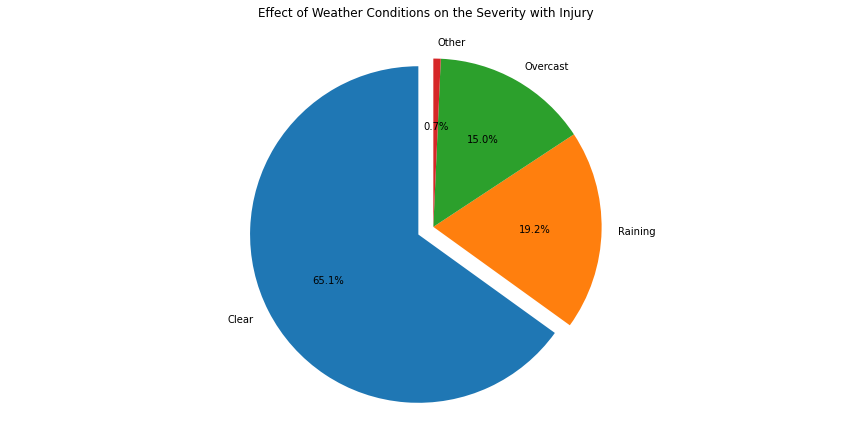

In [89]:
labels = 'Clear', 'Raining', 'Overcast', 'Other'
sizes = [37856, 11176, 8745, sum(Sev_2_w[3:9])]
explode = (0.1,0, 0, 0)
fig1, ax1 = plt.subplots(figsize=(15,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Effect of Weather Conditions on the Severity with Injury', y=1.05)
plt.savefig("image/figure4_weather-to-severity2.png")

### Relationship between the person count and the accident severity with injury

In [50]:
Sev_2_p = Sev_2['PERSONCOUNT'].value_counts()
Sev_2_p

2     27811
3     13461
4      6295
1      3296
5      2969
0      1762
6      1357
7       637
8       284
9       129
10       74
11       33
12       20
13       12
17        8
15        7
14        7
16        5
22        2
19        2
34        2
23        1
32        1
28        1
27        1
25        1
24        1
48        1
37        1
54        1
39        1
20        1
18        1
81        1
29        1
30        1
Name: PERSONCOUNT, dtype: int64

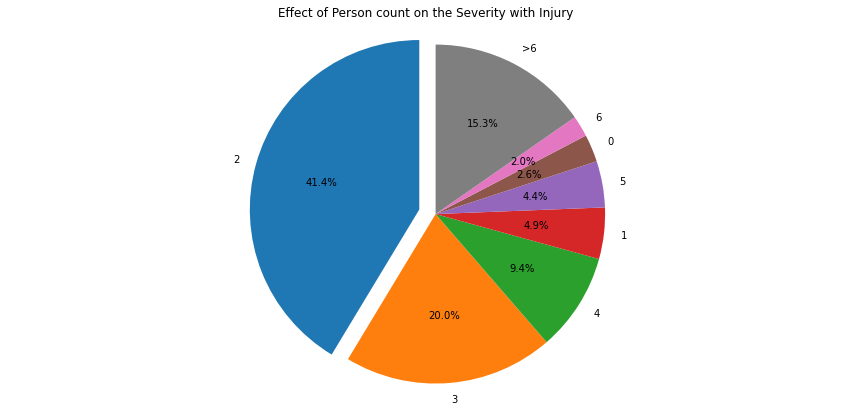

In [90]:
labels = 2, 3, 4, 1, 5, 0, 6, '>6'
sizes = [27811, 13461, 6295, 3296, 2969, 1762, 1357, sum(Sev_2_p[3:9])]
explode = (0.1, 0, 0, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots(figsize=(15,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Effect of Person count on the Severity with Injury', y=1)
plt.savefig("image/figure5_personcount-to-severity2.png")

### Relationship between the vehicle count and the accident severity with injury

In [52]:
Sev_2_v = Sev_2['VEHCOUNT'].value_counts()
Sev_2_v

2     35949
1     14105
3      5470
0      1227
4      1078
5       261
6        60
7        22
9         6
8         5
11        3
10        2
Name: VEHCOUNT, dtype: int64

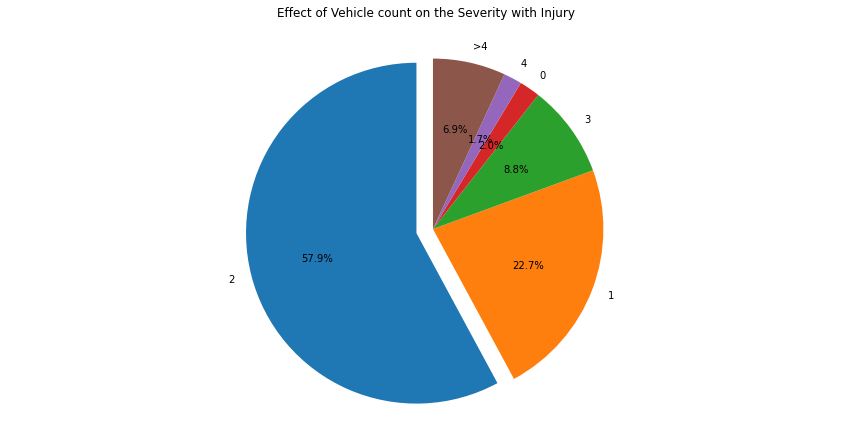

In [91]:
labels = 2, 1, 3, 0, 4,'>4'
sizes = [35949, 14105, 5470, 1227, 1078, sum(Sev_2_p[5:12])]
explode = (0.1, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots(figsize=(15,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Effect of Vehicle count on the Severity with Injury', y=1.05)
plt.savefig("image/figure6_vehiclecount-to-severity2.png")

### Relationship between the junction type and the accident severity with injury

In [54]:
Sev_2_j = Sev_2['JUNCTIONTYPE'].value_counts()
Sev_2_j

2    27174
1    19806
3     7297
4     3234
5      623
6       54
Name: JUNCTIONTYPE, dtype: int64

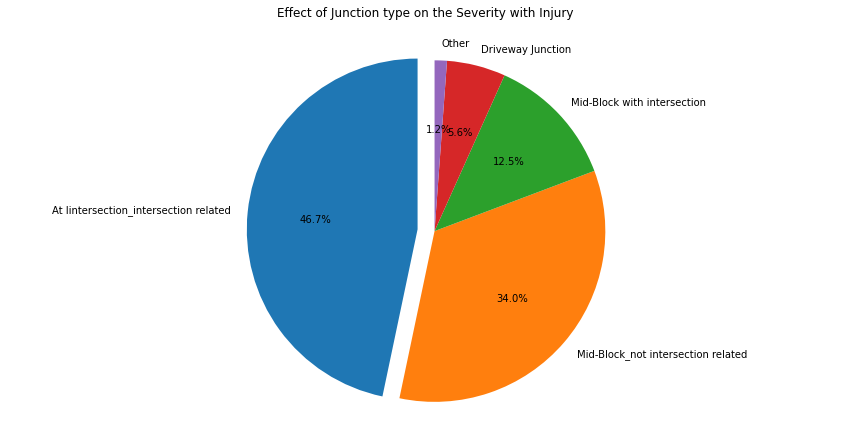

In [92]:
labels = 'At Iintersection_intersection related', 'Mid-Block_not intersection related', 'Mid-Block with intersection', 'Driveway Junction', 'Other'
sizes = [27174, 19806, 7297, 3234, sum(Sev_2_j[4:6])]
explode = (0.1, 0, 0, 0, 0)
fig1, ax1 = plt.subplots(figsize=(15,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Effect of Junction type on the Severity with Injury', y=1.05)
plt.savefig("image/figure7_junction-to-severity2.png")

### Relationship between the inattention and the accident severity with injury

In [56]:
Sev_2_i = Sev_2['INATTENTIONIND'].value_counts()
Sev_2_i

0    47791
1    10397
Name: INATTENTIONIND, dtype: int64

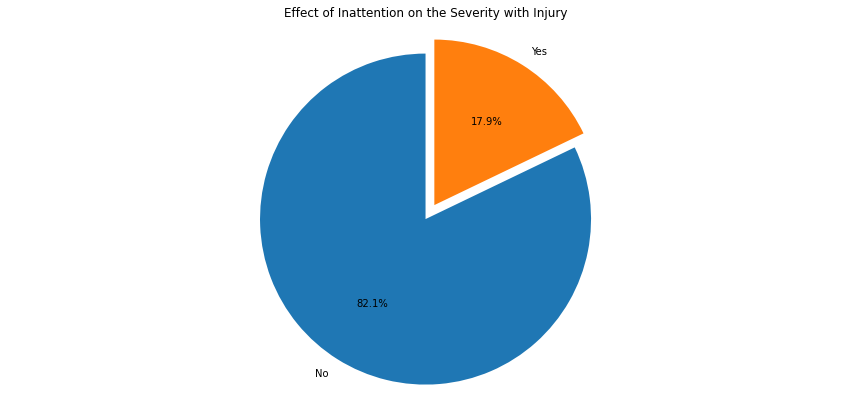

In [95]:
labels = 'No', 'Yes'
sizes = [47791, 10397]
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(15,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Effect of Inattention on the Severity with Injury', y=1)
plt.savefig("image/figure8_inattention-to-severity2.png")

### Relationship between the road conditions and the accident severity with injury

In [58]:
Sev_2_r = Sev_2['ROADCOND'].value_counts()
Sev_2_r

1    41916
2    15755
3      273
4      167
5       30
7       24
6       23
Name: ROADCOND, dtype: int64

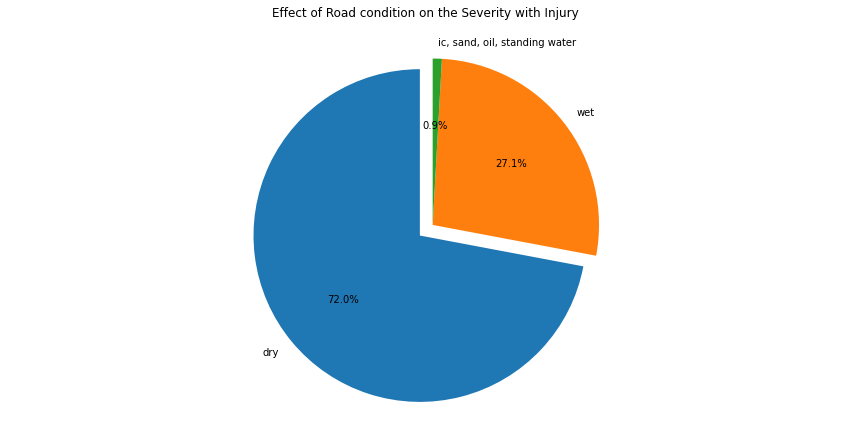

In [96]:
labels = 'dry', 'wet', 'ic, sand, oil, standing water'
sizes = [41916, 15755, sum(Sev_2_r[2:7])]
explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(15,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Effect of Road condition on the Severity with Injury', y=1.05)
plt.savefig("image/figure9_roadcondition-to-severity2.png")

### Relationship between the light conditions and the accident severity with injury

In [60]:
Sev_2_l = Sev_2['LIGHTCOND'].value_counts()
Sev_2_l

0    40291
1    17897
Name: LIGHTCOND, dtype: int64

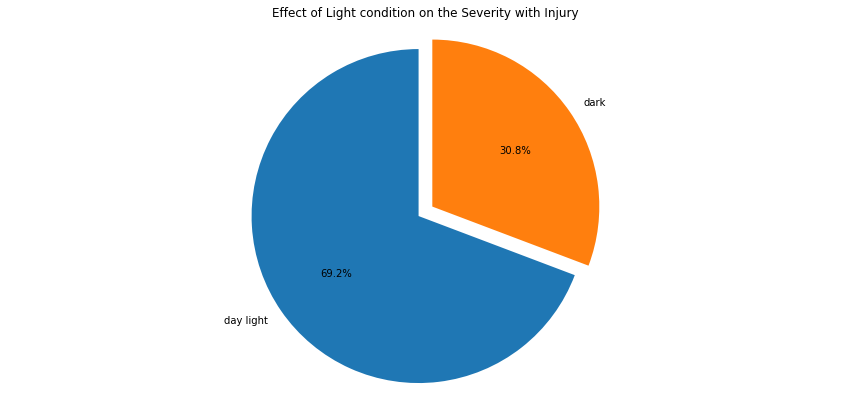

In [97]:
labels = 'day light', 'dark'
sizes = [40291, 17897]
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(15,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Effect of Light condition on the Severity with Injury', y=1)
plt.savefig("image/figure10_lightcondition-to-severity2.png")

### Relationship between the speeding and the accident severity with injury

In [62]:
Sev_2_s = Sev_2['SPEEDING'].value_counts()
Sev_2_s

0    54657
1     3531
Name: SPEEDING, dtype: int64

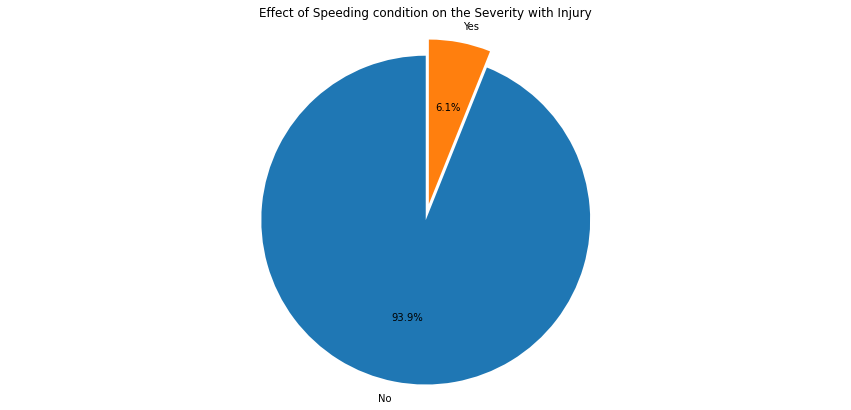

In [98]:
labels = 'No', 'Yes'
sizes = [54657, 3531]
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(15,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Effect of Speeding condition on the Severity with Injury', y=1)
plt.savefig("image/figure11_speeding-to-severity2.png")

## Modeling, Testing and Evaluation <a name="m"></a>

In [64]:
#Making a new data frame
Feature = df2[['LONGITUDE', 'LATITUDE', 'PERSONCOUNT', 'VEHCOUNT',
       'JUNCTIONTYPE', 'INATTENTIONIND', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'SPEEDING']]

In [66]:
X = Feature
print(X)

         LONGITUDE   LATITUDE  PERSONCOUNT  VEHCOUNT  JUNCTIONTYPE  \
0      -122.323148  47.703140            2         2             2   
1      -122.347294  47.647172            2         2             1   
2      -122.334540  47.607871            4         3             1   
3      -122.334803  47.604803            3         3             1   
4      -122.306426  47.545739            2         2             2   
...            ...        ...          ...       ...           ...   
194668 -122.290826  47.565408            3         2             1   
194669 -122.344526  47.690924            2         2             1   
194670 -122.306689  47.683047            3         2             2   
194671 -122.355317  47.678734            2         1             2   
194672 -122.289360  47.611017            2         2             1   

        INATTENTIONIND  WEATHER  ROADCOND  LIGHTCOND  SPEEDING  
0                    0        3         2          0         0  
1                    0       

In [67]:
y = df2['SEVERITYCODE'].values
print(y)

[2 1 1 ... 2 2 1]


### Normalize Data

In [68]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.24930404,  1.50948129, -0.33020207,  0.12553783,  0.24566547,
        -0.42518348,  1.91514317,  1.3926872 , -0.66472702, -0.22440165],
       [-0.56747188,  0.49889979, -0.33020207,  0.12553783, -0.81596734,
        -0.42518348,  0.64986567,  1.3926872 ,  1.50437693, -0.22440165],
       [-0.1360361 , -0.21073866,  1.15576451,  1.7102107 , -0.81596734,
        -0.42518348,  1.91514317, -0.53629605, -0.66472702, -0.22440165],
       [-0.14494267, -0.26614566,  0.41278122,  1.7102107 , -0.81596734,
        -0.42518348, -0.61541182, -0.53629605, -0.66472702, -0.22440165],
       [ 0.81495737, -1.33262277, -0.33020207,  0.12553783,  0.24566547,
        -0.42518348,  0.64986567,  1.3926872 , -0.66472702, -0.22440165]])

In [69]:
#Splitting the data into train-test sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 10) (155738,)
Test set: (38935, 10) (38935,)


### K-Nearest Neighbours (KNN)

In [ ]:
#Finding the best k
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
#ConfustionMx = [];
for n in range(1,Ks):
    #Train Model and Predict  
    kNNeigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = kNNeigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])


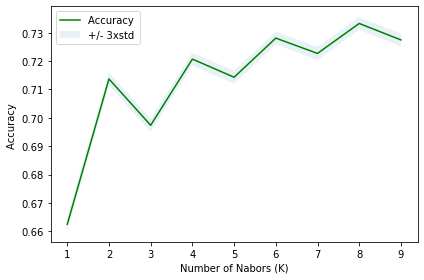

In [84]:
#Plot model accuracy for Different number of Neighbors
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.savefig("image/figure12_KNN.png")

In [85]:
print( "Best k =", mean_acc.argmax()+1) 

Best k = 8


In [70]:
#Building the model using the best k 
k=8
kNNeigh= KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
kNNeigh

KNeighborsClassifier(n_neighbors=8)

In [71]:
#Evalaution
yhat = kNNeigh.predict(X_test)
KNN_accuracy_score = metrics.accuracy_score(y_test, yhat)
print("K-Nearest Neighbours Accuray: ", KNN_accuracy_score)

K-Nearest Neighbours Accuray:  0.7329395145755747


### Decision Tree

In [72]:
#Modeling
DTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [73]:
#Prediction
yhat = DTree.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1])

In [74]:
#Evalaution
DT_accuracy_score = metrics.accuracy_score(y_test, yhat)
print("DecisionTrees's Accuracy: ", DT_accuracy_score)

DecisionTrees's Accuracy:  0.7429562090663927


### Logistic Regression

In [75]:
#Modeling
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [76]:
#Prediction
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1])

In [77]:
#Evalaution
LR_accuracy_score = metrics.accuracy_score(y_test, yhat)
print("Logistic Regresion's Accuracy: ", LR_accuracy_score)

Logistic Regresion's Accuracy:  0.7030949017593425


### Random Forest

In [78]:
#Modeling
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [79]:
#Prediction
yhat =clf.predict(X_test) 

In [80]:
#Evalaution
RF_accuracy_score = metrics.accuracy_score(y_test, yhat)
print("Random Forest's Accuracy: ", RF_accuracy_score)

Random Forest's Accuracy:  0.7114164633363298


### Visualize important features using Random Forest

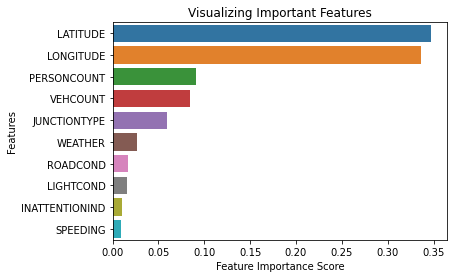

In [99]:
# Create a list of feature names
feat_labels = ['SEVERITYCODE', 'LONGITUDE', 'LATITUDE','PERSONCOUNT', 
               'VEHCOUNT', 'JUNCTIONTYPE', 'INATTENTIONIND',
               'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING']
# Set the target for the prediction
target='SEVERITYCODE'

# Create arrays for the features and the response variable

# set X and y
y = df2[target]
X = df2.drop(target, axis=1)

# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the classifier
clf.fit(X_train, y_train)

feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)

# Creating a bar plot, displaying only the top k features
k=10
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:k])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.savefig("image/figure13_Random-Forest.png")

## Results and Discussion <a name="r"></a> 

### Plot the accuracy score versus algorithm

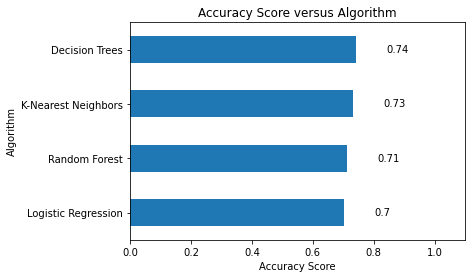

In [102]:
algo_lst =['K-Nearest Neighbors','Decision Trees','Logistic Regression','Random Forest']

accuracy_lst = [KNN_accuracy_score, DT_accuracy_score, LR_accuracy_score, RF_accuracy_score]

# Generate a list of ticks for y-axis
y_ticks=np.arange(len(algo_lst))

#Combine the list of algorithms and list of accuracy scores into a dataframe, sort the value based on accuracy score
df_acc=pd.DataFrame(list(zip(algo_lst, accuracy_lst)), columns=['Algorithm','Accuracy_Score']).sort_values(by=['Accuracy_Score'],ascending = True)

# Make a plot
ax=df_acc.plot.barh('Algorithm', 'Accuracy_Score', align='center',legend=False)

# Add the data label on to the plot
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.1, i.get_y()+0.2, str(round(i.get_width(),2)), fontsize=10)

# Set the limit, lables, ticks and title
plt.xlim(0,1.1)
plt.xlabel('Accuracy Score')
plt.yticks(y_ticks, df_acc['Algorithm'], rotation=0)
plt.title('Accuracy Score versus Algorithm')
plt.savefig("image/figure14_algorithm-score.png")

Comparing the score of accuracies obtained by the algorithms K-Nearest Neighbors, Decision Tree, Logistic Regression, and Random Forest, the decision tree has been proved to give better accuracy. 

During the modeling with the K-Nearest Neighbors classifier, it was observed that the computer required much more time.  But it took less time to execute the decision tree modeling. This can also represent better effectiveness and compatibility of the decision tree for handling this given dataset.  

## Conclusion and Outlook <a name="c"></a> 

In this study, supervised machine learning is employed to predict car accident severity. The imbalanced dataset is firstly balanced, and the raw data is understood and prepared in different steps to be used for the predictive modeling analysis. In parallel, an explanatory data analysis is done to gain more insight into the relationship between the features and the severity of the accidents.

Four machine learning algorithms (K-Nearest Neighbors, Decision Trees, Logistic Regression, and Random Forest) are applied in which the decision tree has shown better compatibility with the dataset, resulting in higher accuracy (0.74).

One idea for future work can be developing the decision tree machine learning model to improve its accuracy further. Adding more data to the dataset can help to compensate for the missing values. Gathering more data about other parameters such as the age of the drivers can also help to gain a more detailed insight into the car accident severity.